# Time-series prediction with Keras `SimpleRNN` class
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536 ([LinkedIn](https://www.linkedin.com/in/tirthajyoti-sarkar-2127aa7/), [Github](https://tirthajyoti.github.io))

For more tutorial-style notebooks on deep learning, **[here is my Github repo](https://github.com/tirthajyoti/Deep-learning-with-Python)**.

For more tutorial-style notebooks on general machine learning, **[here is my Github repo](https://github.com/tirthajyoti/Machine-Learning-with-Python)**.

---
### What is this Notebook about?
In this notebook, we show a building simple recurrent neural network (RNN) using Keras.

We will generate some synthetic time-series data by multiplying two periodic/ sinusoidal signals and adding some stochasticity (Gaussian noise). Then, we will take a small fraction of the data and train a simple RNN model with it and try to predict the rest of the data and see how the predictions match up with the ground truth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import Callback
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = read_csv("aapl_1min_data From 2006 -2024.csv")
print(df.head())

                  Date      Open      High       Low     Close  Adj Close  \
0  2006-01-03 00:00:00  2.585000  2.669643  2.580357  2.669643   2.257056   
1  2006-01-03 00:01:00  2.585068  2.669673  2.580413  2.669648   2.257061   
2  2006-01-03 00:02:00  2.585136  2.669704  2.580469  2.669654   2.257065   
3  2006-01-03 00:03:00  2.585205  2.669734  2.580524  2.669659   2.257070   
4  2006-01-03 00:04:00  2.585273  2.669765  2.580580  2.669665   2.257074   

         Volume  
0  8.072344e+08  
1  8.071041e+08  
2  8.069738e+08  
3  8.068435e+08  
4  8.067132e+08  


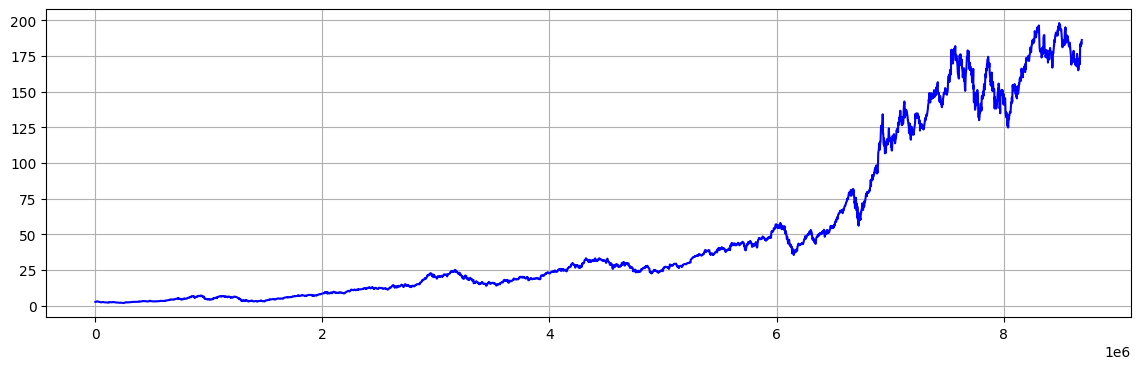

In [3]:
plt.figure(figsize=(14,4))
plt.plot(df['Close'],c='blue')
plt.grid(True)
plt.show()


In [4]:

data=df.drop(columns=['Date','Open','High','Low','Adj Close','Volume'])
data=data[::60*24*30]
print(data)


              Close
0          2.669643
43200      2.403609
86400      2.256823
129600     2.373947
172800     2.320993
...             ...
8510400  191.069462
8553600  186.004311
8596800  169.273467
8640000  168.884735
8683200  184.286611

[202 rows x 1 columns]


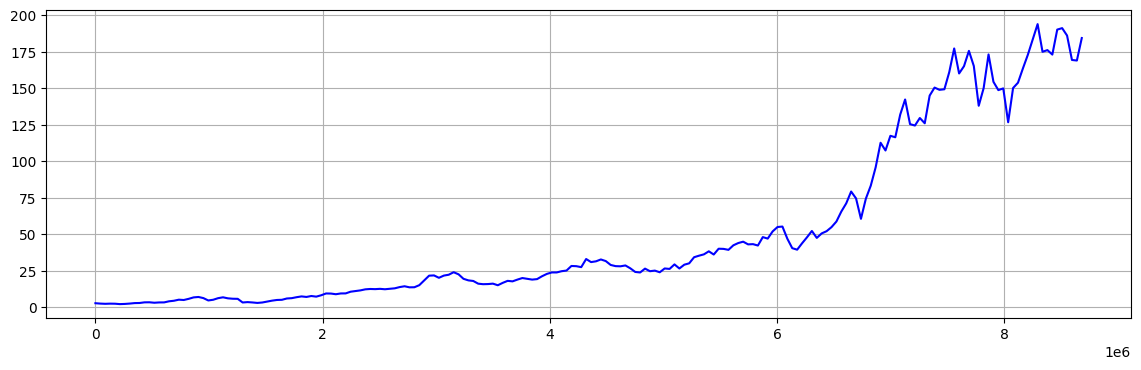

In [5]:
plt.figure(figsize=(14,4))
plt.plot(data,c='blue')
plt.grid(True)
plt.show()

In [6]:
datanp=np.array(data)
datanp
datanp = datanp[1:]-datanp[:-1]
datanp

array([[-2.66034419e-01],
       [-1.46785693e-01],
       [ 1.17124066e-01],
       [-5.29541133e-02],
       [-2.68526240e-01],
       [ 1.24403111e-01],
       [ 2.44829627e-01],
       [ 3.27593365e-01],
       [ 7.14660125e-02],
       [ 4.38843514e-01],
       [ 4.43557950e-02],
       [-3.11035347e-01],
       [ 2.06155772e-01],
       [ 2.94739682e-02],
       [ 7.47141022e-01],
       [ 3.76520422e-01],
       [ 7.28047052e-01],
       [-2.15266010e-01],
       [ 7.92835071e-01],
       [ 9.91763266e-01],
       [ 2.88638412e-01],
       [-7.67558940e-01],
       [-1.61732666e+00],
       [ 4.80682884e-01],
       [ 1.08693830e+00],
       [ 5.89192010e-01],
       [-6.98893680e-01],
       [-2.79819627e-01],
       [-6.39433683e-02],
       [-2.49735711e+00],
       [ 2.54803858e-01],
       [-2.35064926e-01],
       [-3.22329883e-01],
       [ 2.89733016e-01],
       [ 6.61704736e-01],
       [ 6.06831410e-01],
       [ 4.65476581e-01],
       [ 1.12340729e-01],
       [ 8.9

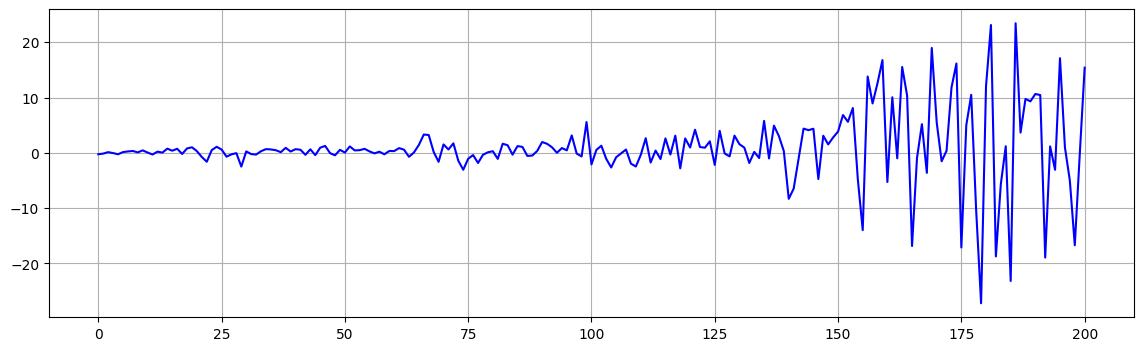

In [7]:
plt.figure(figsize=(14,4))
plt.plot(datanp,c='blue')
plt.grid(True)
plt.show()

In [8]:
#data = np.array(data.values.astype('float32'))
#Normalise data into (0,1) range 
scaler = MinMaxScaler(feature_range=(0, 1))
normData = scaler.fit_transform(datanp).flatten()
normData=pd.DataFrame(normData,columns=["Close"])
normData['Close'][187]
#normData.sort_values(by=['Close'])




0.6095720524948176

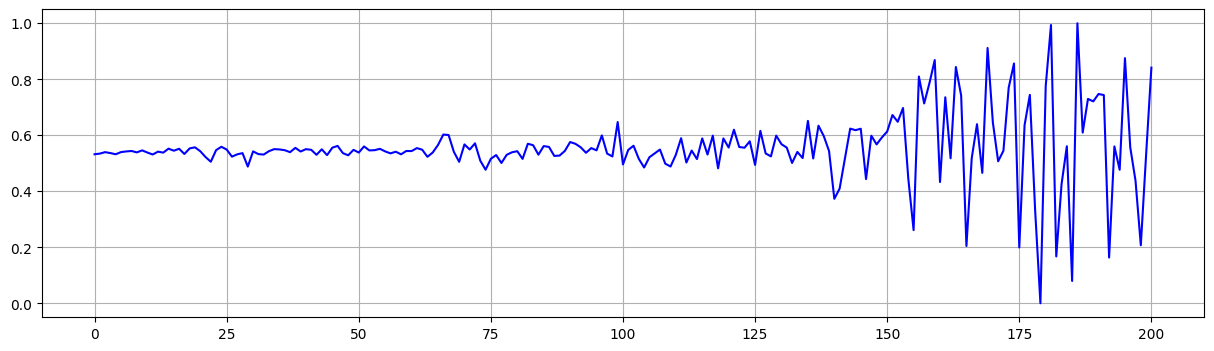

In [9]:
plt.figure(figsize=(15,4))
plt.plot(normData,c='blue')
plt.grid(True)
plt.show()

### Split the values in train and test

So, we took only 25% of the data as training samples and set aside the rest of the data for testing. 

Looking at the time-series plot, we think **it is not easy for a standard model to come up with correct trend predictions.**

In [12]:
split = int(len(normData) * 0.7)
values = normData.values
train = values[:split]
test = values[split:]
print(len(values))

#train,test = values[0:Tp,:], values[Tp:N,:]

201


In [34]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (140, 1)
Test data length: (61, 1)


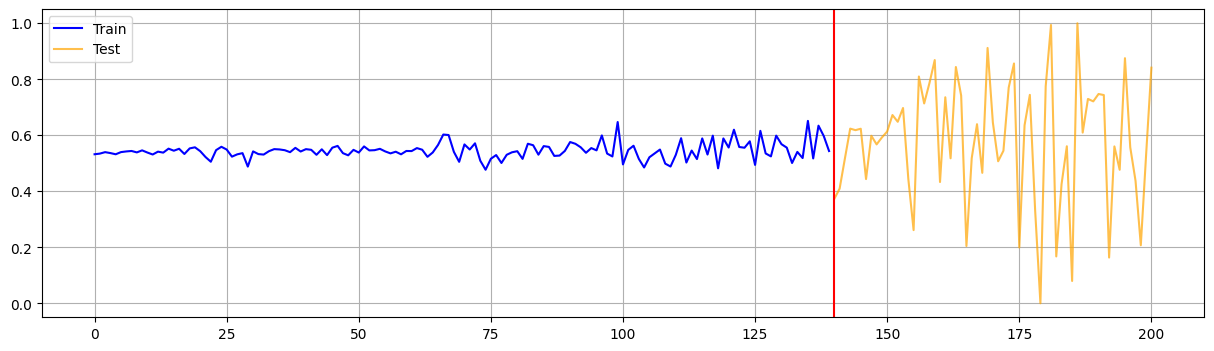

In [14]:
index = normData.index.values

plt.figure(figsize=(15,4))
plt.plot(index[0:split],train,c='blue')
plt.plot(index[split:],test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.axvline(df.index[split], c="r")
plt.grid(True)
plt.show()

In [15]:
step = 4
print("Train data length:", train.shape)
print("Test data length:", test.shape)
print(test[900:1800])
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
print(test[900:1800])

Train data length: (140, 1)
Test data length: (61, 1)
[]
[]


In [16]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (144,)
Test data length: (65,)


### Converting to a multi-dimensional array
Next, we'll convert test and train data into the matrix with step value as it has shown above example.

In [17]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [19]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

print(trainX.shape, trainY.shape)
print(trainX[103], trainY[100])

(140, 4) (140,)
[0.51567076 0.48499403 0.5214648  0.53511756] 0.484994028393897


In [20]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (140, 1, 4) ,  (140,)
Test data shape: (61, 1, 4) ,  (61,)


### Keras model with `SimpleRNN` layer

- 256 neurons in the RNN layer
- 32 denurons in the densely connected layer
- a single neuron for the output layer
- ReLu activation
- learning rate: 0.001

In [22]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr),metrics=['mse'])
    
    return model

In [23]:
model = build_simple_rnn() # Taking the defaults

c:\Users\iadra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,185 (82.75 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 0 (0.00 B)

### A simple callback class to show a message every 50 epochs

In [25]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

### Fit the model

In [26]:
batch_size=16
num_epochs = 1000

In [27]:
model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 550 done
Epoch number 600 done
Epoch number 650 done
Epoch number 700 done
Epoch number 750 done
Epoch number 800 done
Epoch number 850 done
Epoch number 900 done
Epoch number 950 done
Epoch number 1000 done


### Plot loss

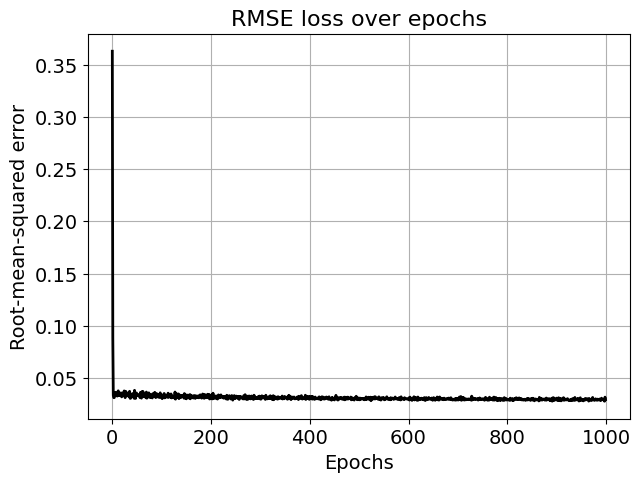

In [28]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Predictions
Note that the model was fitted only with the `trainX` and `trainY` data. 

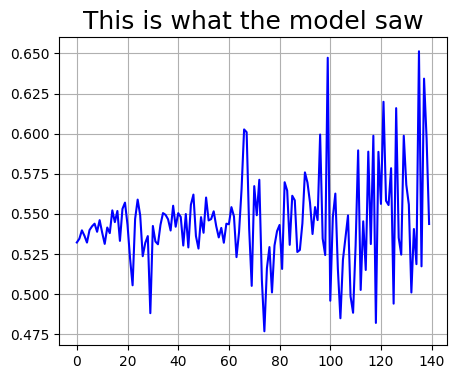

In [29]:
plt.figure(figsize=(5,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(trainX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [30]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


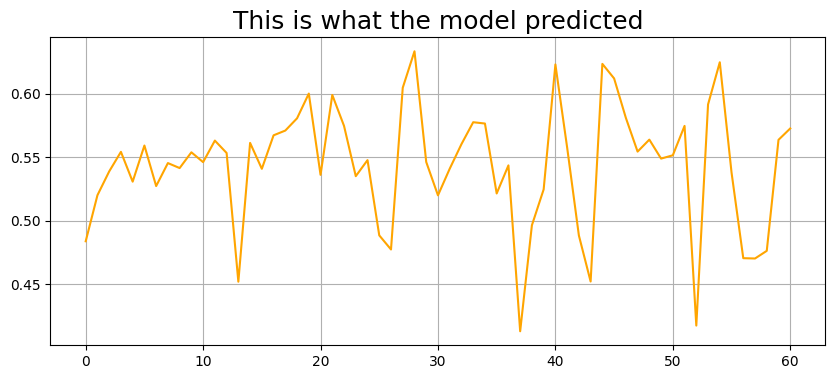

In [31]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

### Comparing it with the ground truth (test set)

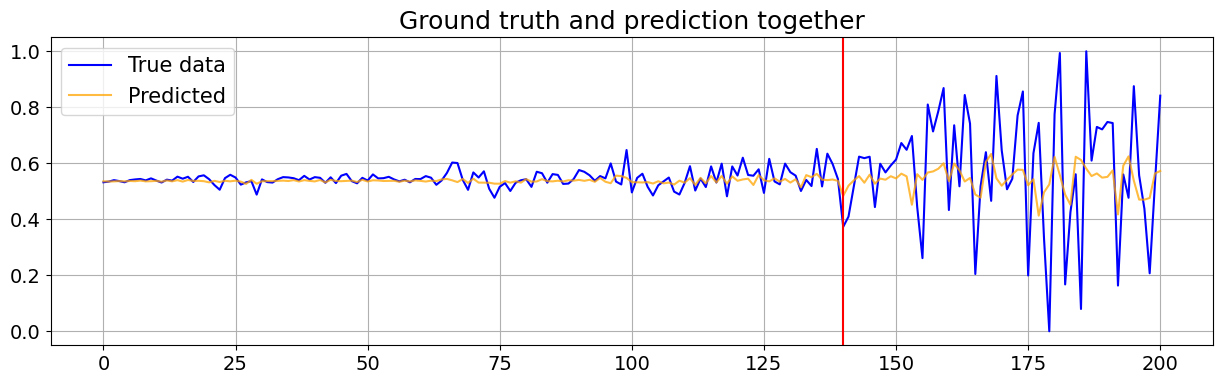

In [33]:
index = normData.index.values
plt.figure(figsize=(15,4))
plt.title("Ground truth and prediction together",fontsize=18)
plt.plot(index,normData,c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(normData.index[split], c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### How are the errors distributed?
The errors, or residuals, as they are called in a regression problem, can be plotted to see if they follow any specific distribution. In the generation process, we injected Gaussian noise, so we expect the error to follow the same pattern, _if the model has been able to fit to the real data correctly_.

In [35]:
error=predicted[split:len(normData)]-normData[split:len(normData)]
error=np.array(error).ravel()

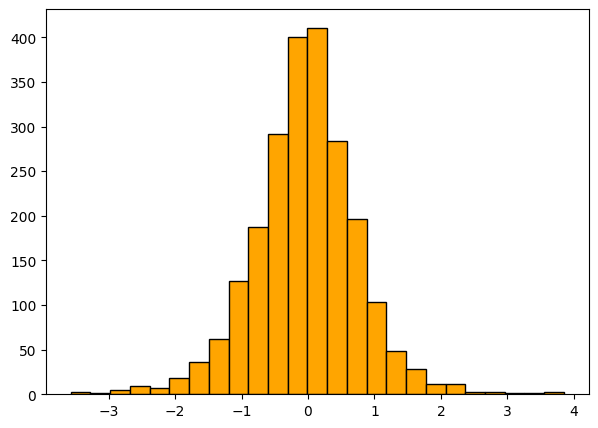

In [42]:
plt.figure(figsize=(7,5))
plt.hist(error,bins=25,edgecolor='k',color='orange')
plt.show()

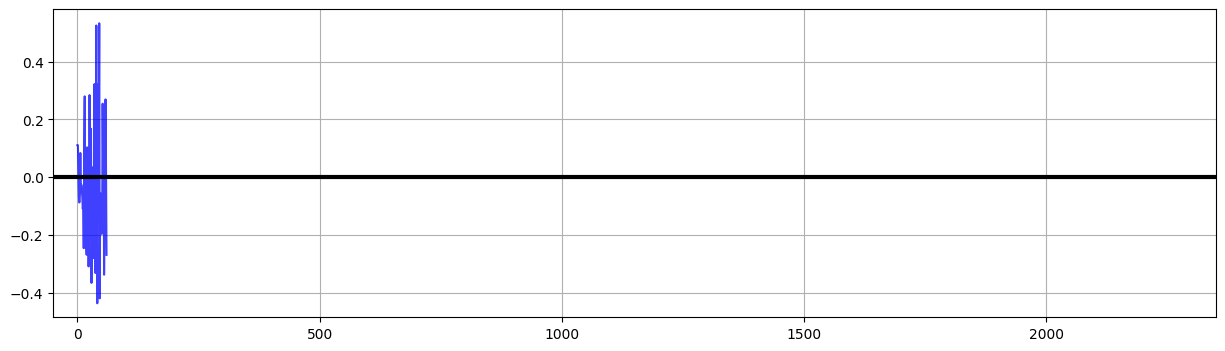

In [36]:
plt.figure(figsize=(15,4))
plt.plot(error,c='blue',alpha=0.75)
plt.hlines(y=0,xmin=-50,xmax=2400,color='k',lw=3)
plt.xlim(-50,2350)
plt.grid(True)
plt.show()

## Make the model better

Note, for running these experiments reasonably fast, we will fix the model size to be smaller than the model above. We will use a RNN layer with 32 neurons followed by a densely connected layer of 8 neurons.

### Varying the embedding/step size

In [37]:
def predictions(model,trainX,testX):
    trainPredict = model.predict(trainX)
    testPredict= model.predict(testX)
    predicted=np.concatenate((trainPredict,testPredict),axis=0)
    
    return predicted

In [38]:
def plot_compare(predicted):
    index = normData.index.values
    plt.figure(figsize=(15,4))
    plt.title("Ground truth and prediction together",fontsize=18)
    plt.plot(index,normData,c='blue')
    plt.plot(index,predicted,c='orange',alpha=0.75)
    plt.legend(['True data','Predicted'],fontsize=15)
    plt.axvline(normData.index[split], c="r")
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [39]:
def prepare_data(step=4):
    values=normData.values
    train,test = values[0:split,:], values[split:len(normData),:]
    test = np.append(test,np.repeat(test[-1,],step))
    train = np.append(train,np.repeat(train[-1,],step))
    trainX,trainY =convertToMatrix(train,step)
    testX,testY =convertToMatrix(test,step)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    return trainX,testX,trainY,testY

c:\Users\iadra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Embedding size: 2
----------------------------------------------------------------------------------------------------


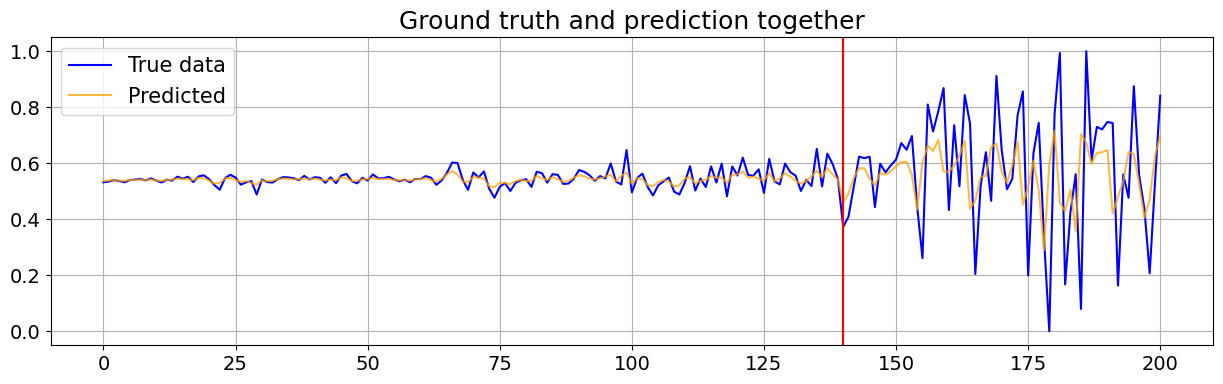


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Embedding size: 4
----------------------------------------------------------------------------------------------------


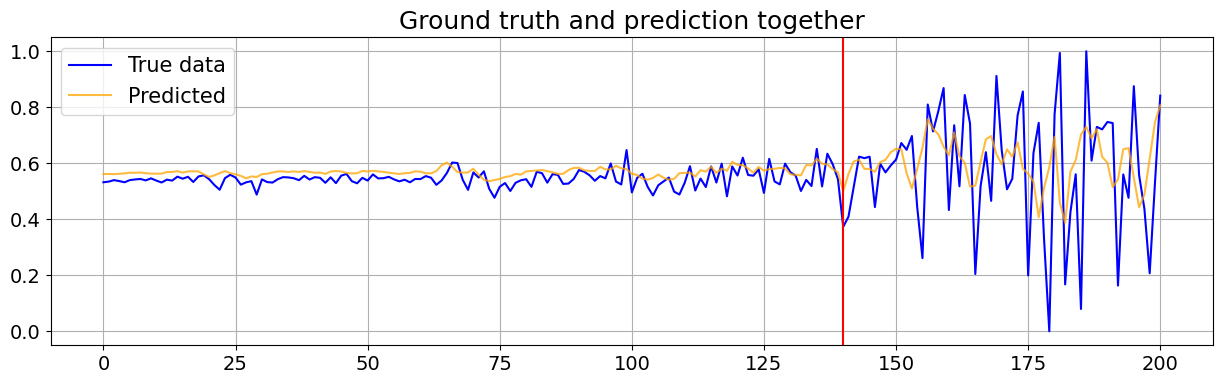


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Embedding size: 6
----------------------------------------------------------------------------------------------------


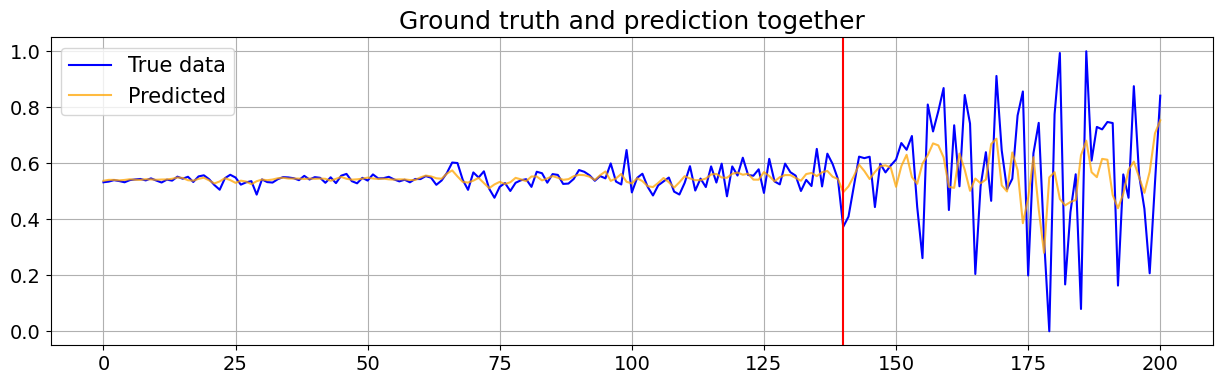


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Embedding size: 8
----------------------------------------------------------------------------------------------------


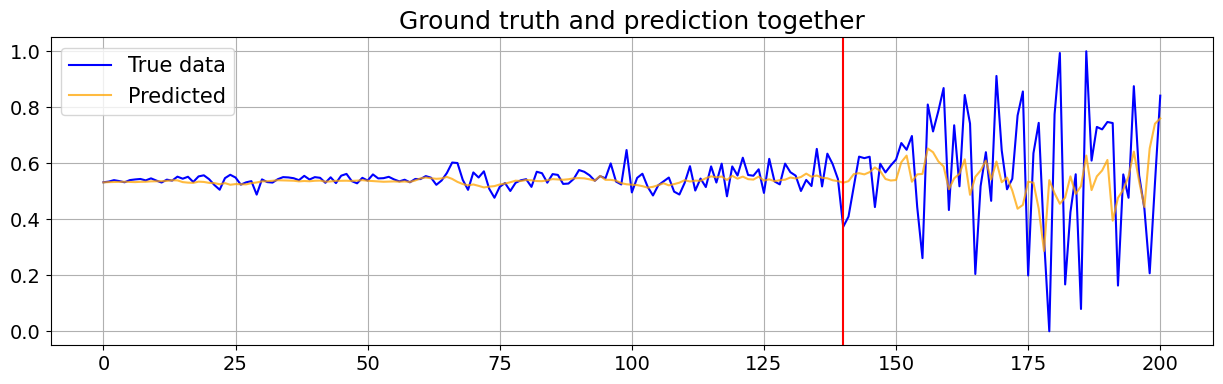


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Embedding size: 10
----------------------------------------------------------------------------------------------------


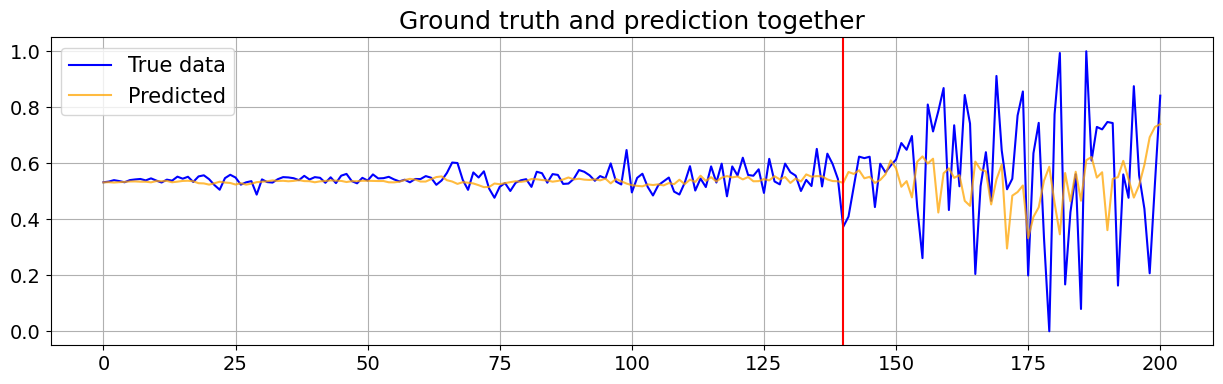


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
Embedding size: 12
----------------------------------------------------------------------------------------------------


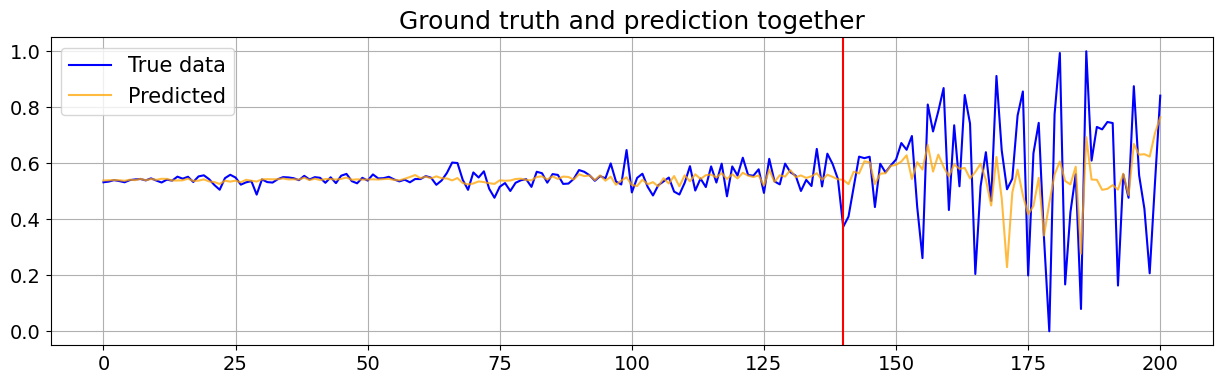

In [40]:
for s in [2,4,6,8,10,12]:
    trainX,testX,trainY,testY = prepare_data(s)
    model = build_simple_rnn(num_units=32,num_dense=8,embedding=s)
    batch_size=16
    num_epochs = 100
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Embedding size: {}".format(s))
    print("-"*100)
    plot_compare(preds)
    print()

### Number of epochs

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Ran for 100 epochs
----------------------------------------------------------------------------------------------------


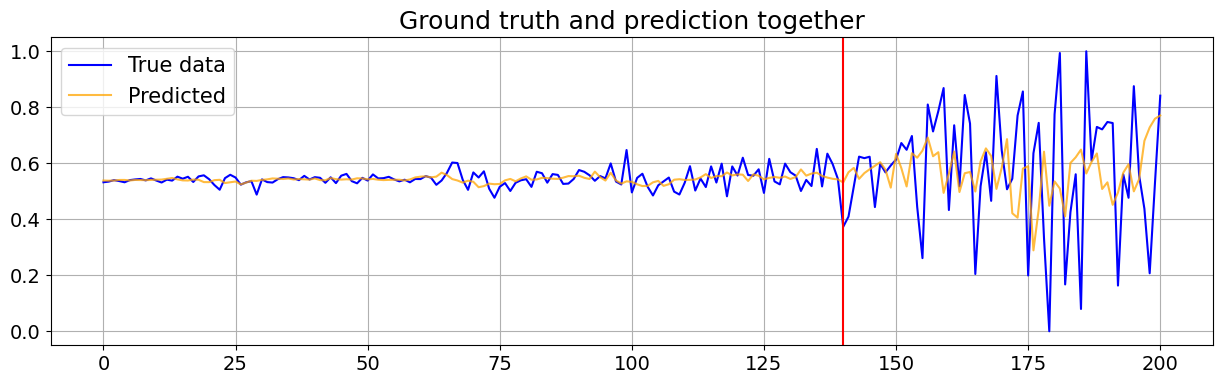


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ran for 200 epochs
----------------------------------------------------------------------------------------------------


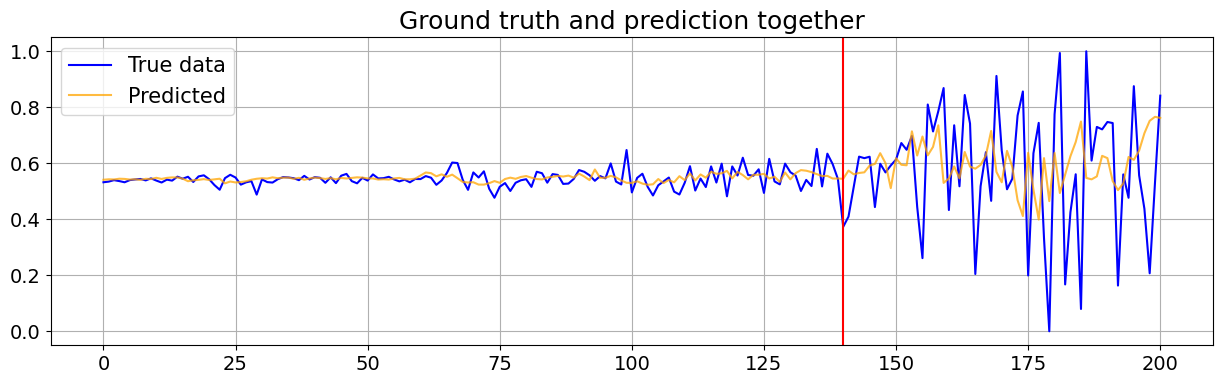


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Ran for 300 epochs
----------------------------------------------------------------------------------------------------


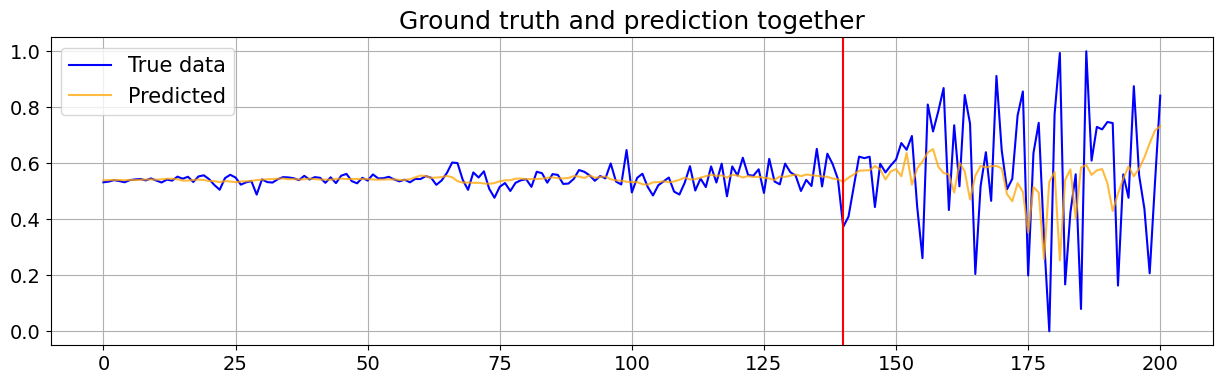


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ran for 400 epochs
----------------------------------------------------------------------------------------------------


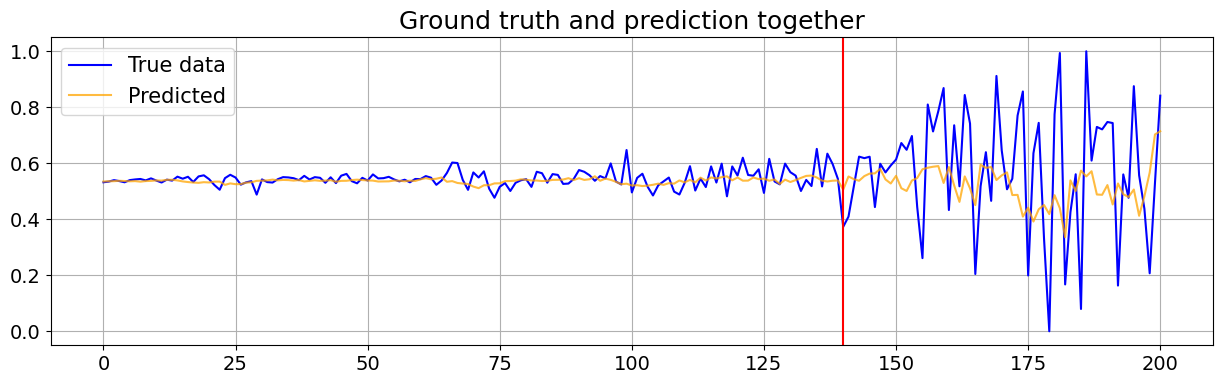


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ran for 500 epochs
----------------------------------------------------------------------------------------------------


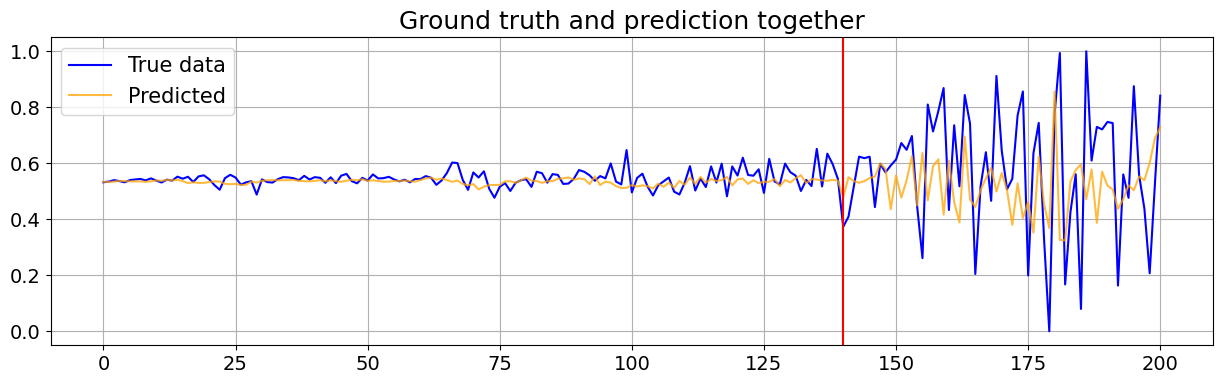

In [41]:
for e in [100,200,300,400,500]:
    trainX,testX,trainY,testY = prepare_data(8)
    model = build_simple_rnn(num_units=32,num_dense=8,embedding=8)
    batch_size=16
    num_epochs = e
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Ran for {} epochs".format(e))
    print("-"*100)
    plot_compare(preds)
    print()

### Batch size

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Ran with batch size: 4
----------------------------------------------------------------------------------------------------


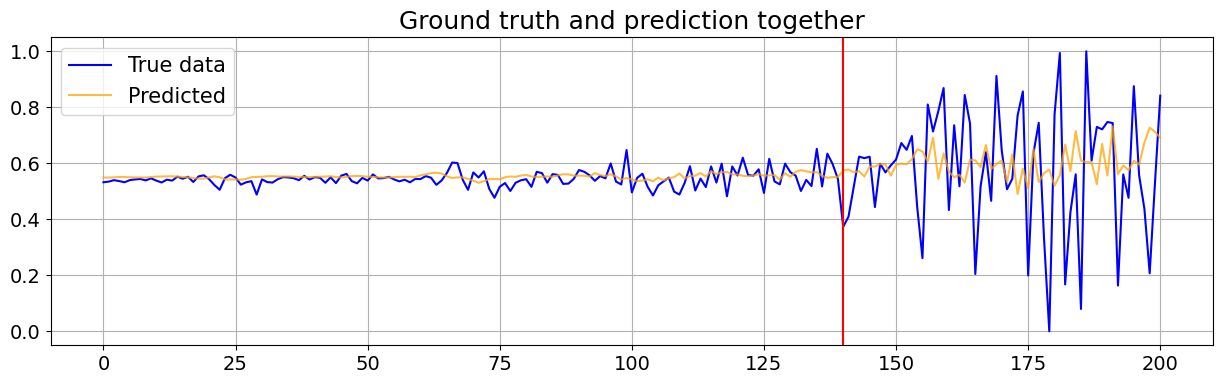


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Ran with batch size: 8
----------------------------------------------------------------------------------------------------


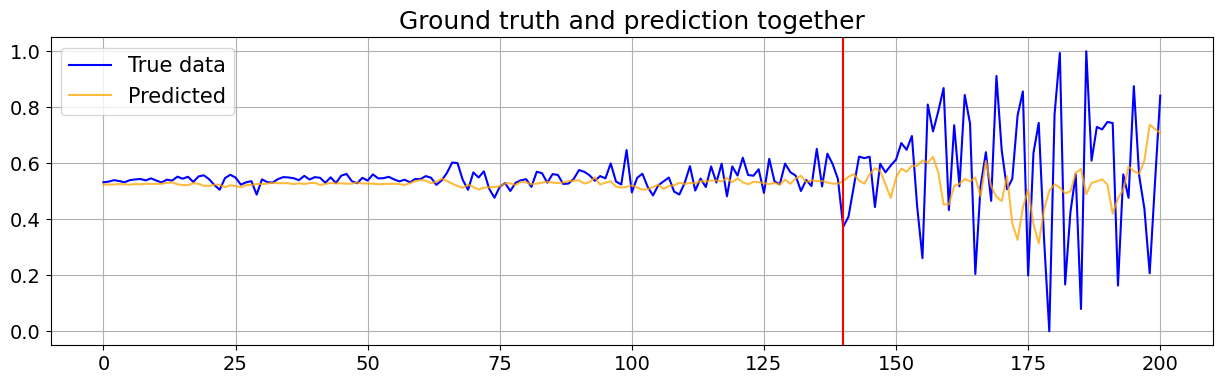


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Ran with batch size: 16
----------------------------------------------------------------------------------------------------


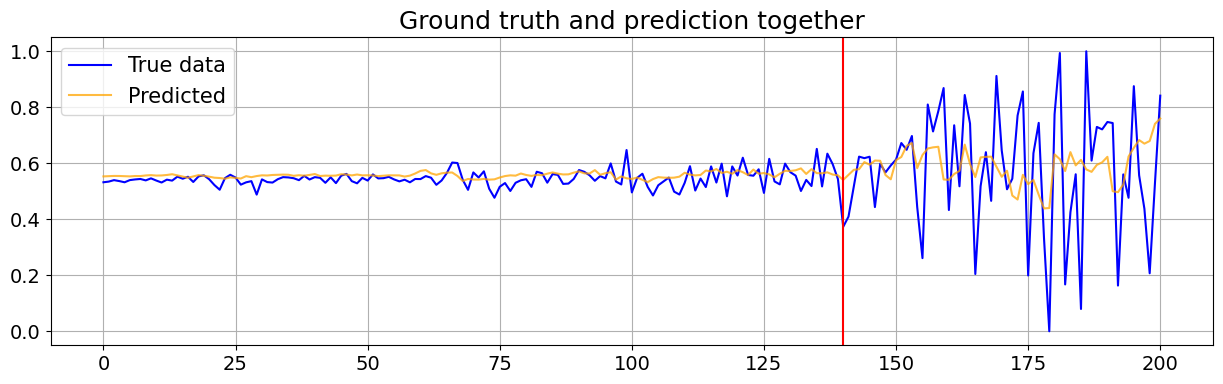


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Ran with batch size: 32
----------------------------------------------------------------------------------------------------


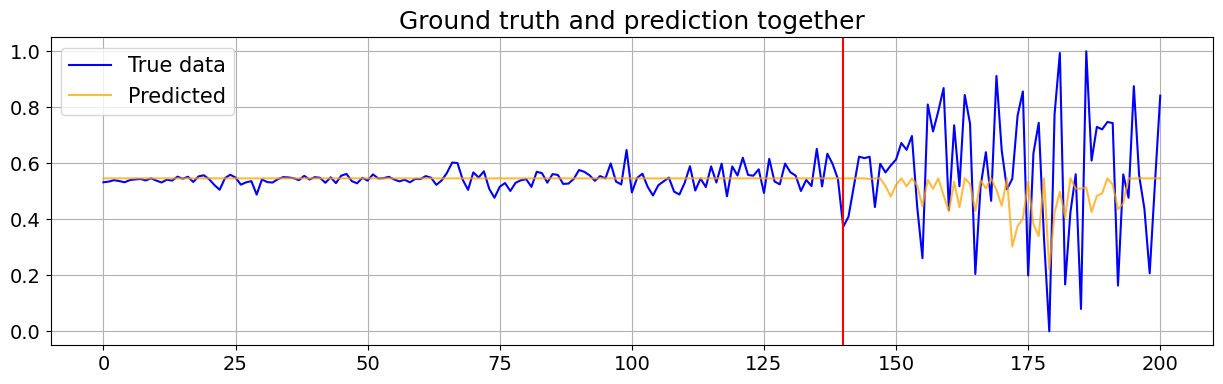


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Ran with batch size: 64
----------------------------------------------------------------------------------------------------


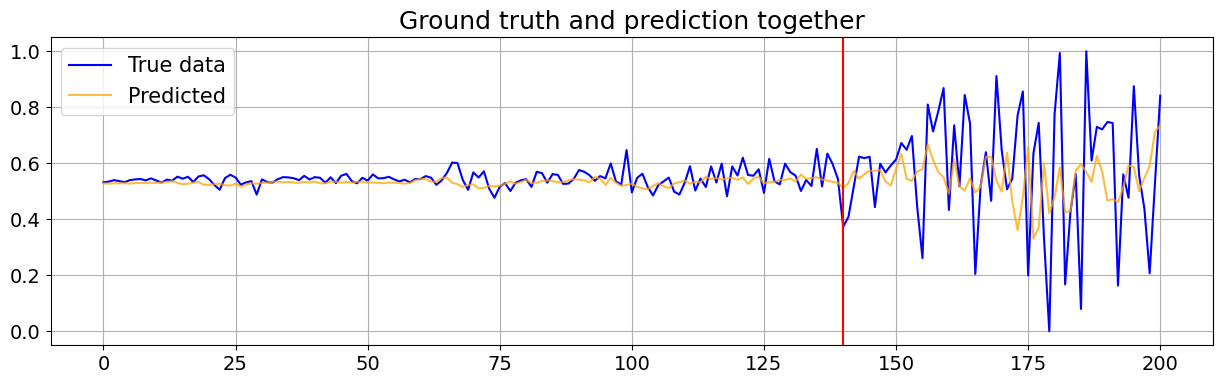

In [42]:
for b in [4,8,16,32,64]:
    trainX,testX,trainY,testY = prepare_data(8)
    model = build_simple_rnn(num_units=32,num_dense=8,embedding=8)
    batch_size=b
    num_epochs = 250
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Ran with batch size: {}".format(b))
    print("-"*100)
    plot_compare(preds)
    print()

### Summary

Clearly, following trends were observed,

- Too small embedding size is not useful but a very long embedding is also not effective. An embedding of 8 looks good for this data.
- More epochs are always better.
- A batch size of 8 or 16 looks optimal.

Ultimately, an exhaustive hyperparameter tuning is needed for the best overall performance. Also, the predictive power is not well-defined as we are judging the quality of the prediction mostly visually here but a neumerical metric (or a few of them) would be a better approach.